In [ ]:
conda update --all

In [60]:
from collections import Counter
import itertools
import pandas as pd
import numpy as np
import spacy
import hdbscan
import fasttext
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
dfa = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/A-Z.csv")
dfb = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/Z-A.csv")

In [3]:
print(len(dfa),len(dfb))

5000 4006


In [4]:
df = pd.concat([dfa,dfb]).reset_index()

In [183]:
len(df)

9006

In [184]:
df_eid = set(df['EID'])

In [ ]:
sum(df.duplicated(subset=['EID']))

1

Each line contains a label followed by a semicolon, followed by an explantion.

1. Domain; The domain or vertical under study. Examples of domains include but are not limited to: buildings, pharmaceutical facilities, autonomous vehicles, aerospace, manufactoring, among others.
2. Input; Type input data. Some examples of input data include but should not be limited to: sensor data, time series, natural language text, structured data, unstructured data, images.
3. Output; Type of output. Some examples of output type include but should not be limited to: Remaining Useful Life, fault prediction, root cause analysis among others.
4. Modeling category; Modeling techniques category. One of the following: Rules and/or logic based, physics based, first principles, knowledge based (ontogies, knowledge graphs), data driven (statistical, machine learning, deep learning), hybrid, neurosymbolic, physics informed or other.
5. Modeling technique; Some examples of techniques include but should not be limited to: SVM, GNN, CNN, PINN and many more.
6. Explainability; If the system is explainable or interpretable, provide the explainability technique? Otherwise state no or unknown.
7. Relevance; How relevant the study is on a scale of 0 (lowest) to 5 (highest). The study should be relevant to predictive maintenance in HVAC systems for commercial buildings or pharmaceutical facilities or chip manufacturing. The system should use sensor data as input. Such systems which also combine rules and machine learning, and are interpretable have the highest relevance.
8. EID. Copy the EID from the provided file.


Provide a CSV where the columns are the labels from the list above. For each row in the provided csv file use the 'text' column to infer and extract the above information. Copy the EID from the provided file into the EID column of the new CSV.



In [6]:
df['Abstract'][6]

'Partial discharge(PD) is an effective method to evaluate the insulation state of power cables. Accurate detection and localization of PD signals in cables can be conducive to detect the early fault of the cables.Where to place the sensor to capture and locate the PD signals is a problem in the cable system that one end of the sheath is grounded and one end the sheath is grounded through the sheath protector. For the purpose of solving this problem, we build a ethylenepropylene rubber insulated(EPR) power cable model in ATP-EMTP and study propagation characteristics of PD signals in cables as well as the coupling effect between the conductor and the sheath of the cables. Then the cable system that one end of the sheath is grounded and one end the sheath is grounded through the sheath protector is built. And the optimal installation position of the sensor is determined by simulation. Based on the above research,the PD signals can be located by using the two-terminal location method. © 2

In [7]:
df.head()

,index,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,...,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,0,Chen X.; Hu Y.; Gu Y.; Lin Y.,"Chen, Xiaoxin (59667142000); Hu, Yuhui (596660...",59667142000; 59666011500; 7403045993; 59538509100,Rolling bearing fault diagnosis method of acou...,2024,15th Global Reliability and Prognostics and He...,NaN,NaN,NaN,...,10.1109/PHM-BEIJING63284.2024.10874631,https://www.scopus.com/inward/record.uri?eid=2...,Bearing faults are one of the most common caus...,Acoustic-vibration fusion; Attention-1DCNN; Fa...,Acoustic emission testing; Acoustic emissions;...,Conference paper,Final,NaN,Scopus,2-s2.0-85219599283
1,1,Singha A.; Ali J.; Khera V.,"Singha, Anudruti (57220211068); Ali, Junaid (5...",57220211068; 57215967124; 57222122147,Predictive Failure Analysis of Spindle Motor &...,2020,2020 IEEE 17th India Council International Con...,NaN,NaN,9342533,...,10.1109/INDICON49873.2020.9342533,https://www.scopus.com/inward/record.uri?eid=2...,"With the advent of Industry 4.0, manufacturing...",Fast Fourier Transform; Internet of Things (Io...,Costs; Cutting fluids; Deterioration; Failure ...,Conference paper,Final,NaN,Scopus,2-s2.0-85101539067
2,2,Papadopoulos P.M.; Lymperopoulos G.; Polycarpo...,"Papadopoulos, Panayiotis M. (56423323300); Lym...",56423323300; 25031948600; 7006251578; 24514347400,Model-based fault detection and localization a...,2020,16th Conference of the International Society o...,NaN,NaN,NaN,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,This work presents the design of a model-based...,Air handling units; Fault diagnosis in buildin...,Air quality; Fault detection; Indoor air pollu...,Conference paper,Final,NaN,Scopus,2-s2.0-85101634616
3,3,Eisermann C.; Voigt C.; Marx S.; Kang C.,"Eisermann, Cedric (58809877800); Voigt, Chris ...",58809877800; 57459489100; 14013879200; 5720079...,The Initial Structural Health Monitoring Syste...,2024,11th European Workshop on Structural Health Mo...,NaN,NaN,NaN,...,10.58286/29620,https://www.scopus.com/inward/record.uri?eid=2...,As an essential part of the validation project...,Nibelungen Bridge Worms; predictive maintenanc...,Bridges; Structural health monitoring; Conditi...,Conference paper,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85202570011
4,4,Li M.; Bai J.; Xia H.; Xu L.; Ding D.; Ren C.,"Li, Min (57221971210); Bai, Jichang (572219701...",57221971210; 57221970105; 57217361993; 5721735...,Test research on poor contact defect detection...,2020,2020 IEEE 1st China International Youth Confer...,NaN,NaN,9332738,...,10.1109/CIYCEE49808.2020.9332738,https://www.scopus.com/inward/record.uri?eid=2...,GIS is the key equipment in power transmission...,Conductive loop; GIS; Poor contact; Temperatur...,Defects; Electric power supplies to apparatus;...,Conference paper,Final,NaN,Scopus,2-s2.0-85100730328


In [8]:
data = df[['Title','Abstract','EID']]
data['text'] = data['Title'] + " " + data['Abstract']
data = data[['text','EID']]
data.to_csv('Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data.csv', index=None)

/var/folders/pq/1bk4s5t11rg3zhmr6v9nb1th0000gp/T/ipykernel_73219/1079607169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['Title'] + " " + data['Abstract']


In [9]:
data.head()

,text,EID
0,Rolling bearing fault diagnosis method of acou...,2-s2.0-85219599283
1,Predictive Failure Analysis of Spindle Motor &...,2-s2.0-85101539067
2,Model-based fault detection and localization a...,2-s2.0-85101634616
3,The Initial Structural Health Monitoring Syste...,2-s2.0-85202570011
4,Test research on poor contact defect detection...,2-s2.0-85100730328


In [11]:
keywords = df['Index Keywords'].apply(lambda x: str(x).split("; "))

In [12]:
keywords[0][0]

'Acoustic emission testing'

In [13]:
list(keywords)

[['Acoustic emission testing',
  'Acoustic emissions',
  'Failure modes',
  'Fault detection',
  'Fracture mechanics',
  'Image coding',
  'Image thinning',
  'Intelligent systems',
  'Roller bearings',
  'Acoustic vibration',
  'Acoustic-vibration fusion',
  'Attention-1DCNN',
  'Bearing fault diagnosis',
  'Fault diagnosis method',
  'Faults diagnosis',
  'Features fusions',
  'Multi level fusion',
  'Rolling bearings',
  'Single sensor',
  'Cracks'],
 ['Costs',
  'Cutting fluids',
  'Deterioration',
  'Failure (mechanical)',
  'Forecasting',
  'Predictive analytics',
  'Support vector machines',
  'Time series analysis',
  'Vibration analysis',
  'Intelligent machining',
  'Learning vector quantization algorithms',
  'Maintenance models',
  'Manufacturing industries',
  'Rotating spindle',
  'Running conditions',
  'Sulphur concentration',
  'Support vector machine models',
  'Condition monitoring'],
 ['Air quality',
  'Fault detection',
  'Indoor air pollution',
  'Pattern recognit

In [14]:
merged = list(itertools.chain.from_iterable(list(keywords)))
merged = [x.lower().replace("-"," ") for x in merged]

In [15]:
c = Counter(merged)
c

Counter({'fault detection': 3675,
         'predictive maintenance': 1785,
         'machine learning': 1315,
         'nan': 1273,
         'failure analysis': 1219,
         'faults diagnosis': 1211,
         'deep learning': 1064,
         'faults detection': 1059,
         'internet of things': 873,
         'learning systems': 755,
         'anomaly detection': 733,
         'forecasting': 604,
         'remaining useful lives': 564,
         'neural networks': 549,
         'condition monitoring': 507,
         'convolutional neural networks': 483,
         'convolution': 413,
         'maintenance': 396,
         'remaining useful life predictions': 388,
         'long short term memory': 386,
         'convolutional neural network': 364,
         'sensors faults': 331,
         'feature extraction': 327,
         'support vector machines': 314,
         'learning algorithms': 314,
         'fault tolerance': 306,
         'decision making': 302,
         'sensors data': 282,
  

In [16]:
len(c)

32326

# DATA EXTRACT

In [256]:
d1 = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_001.csv")
d2 = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_847.csv")
d3 = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_3559.csv")
d4 = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_6384.csv")
d5 = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_missed.csv")

In [260]:
de = pd.concat([d5,d1,d2,d3,d4])

In [261]:
print(len(de))
de = de.drop_duplicates(subset=['EID'])
print(len(de))
de.head()

9931
9005


,Domain,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID
0,Navigation systems / Aerospace systems,Sensor data,Fault prediction,Data driven,Extended Kalman Filter (EKF),Yes: Rules and filtering techniques,2.0,2-s2.0-85167810970
1,Industrial IoT applications,"Sensor data, Time series",Remaining Useful Life,Data driven,"['CNN', 'RNN']",No,4.0,2-s2.0-85196096785
2,3D printing / Additive manufacturing,Sensor data,Remaining Useful Life,Data driven,Prognostic model (likely machine learning or s...,Yes: decision support tool (implying interpret...,4.0,2-s2.0-85168427262
3,Structural health monitoring / Civil infrastru...,Electro-mechanical impedance data,Damage classification,Data driven,"['Decision trees', 'Random forests', 'K-neares...","Yes: Decision trees, Random forests, K-nearest...",3.0,2-s2.0-85201317790
4,Chip manufacturing,Sensor data,Setup cost prediction,Data driven,Supervised learning,No,3.0,2-s2.0-85216668025


In [262]:
de.to_csv('Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_extract_all.csv', index=None)

In [ ]:
de_eid = set(de['EID'])

In [267]:
print(len(de['Domain'].unique()))
Counter(de['Domain'])

4942


Counter({'Chip manufacturing': 539,
         'Other': 493,
         'Industrial systems': 246,
         'Commercial buildings': 166,
         'HVAC systems': 142,
         'Manufacturing': 80,
         'Manufacturing systems': 72,
         'Rotating machinery': 60,
         'Automotive systems': 58,
         'Hydraulic systems': 44,
         'Aerospace systems': 40,
         'Photovoltaic systems': 37,
         'Pharmaceutical facilities': 36,
         'Aero-engine systems': 35,
         'Aircraft engines': 34,
         'Industrial machinery': 28,
         'Photovoltaic (PV) systems': 27,
         'Power transformers': 27,
         'Autonomous vehicles': 25,
         'Industrial manufacturing': 25,
         'Industrial processes': 22,
         'Aircraft systems': 21,
         'Wireless Sensor Networks': 20,
         'Industrial robots': 19,
         'Wireless sensor networks': 19,
         'IoT systems': 18,
         'Structural health monitoring': 17,
         'Power distribution syst

In [217]:
Counter(de['Input'])

Counter({'Sensor data': 5528,
         'Sensor data, Time series': 772,
         'Structured data': 479,
         "['Sensor data', 'Time series']": 217,
         'Time series': 197,
         'Images': 183,
         "['Sensor data']": 145,
         'Sensor data, Time series, Images': 72,
         'Unstructured data': 70,
         "['Sensor data', 'Structured data']": 44,
         "['Sensor data', 'Images']": 42,
         'Sensor data, Images': 40,
         'Sensor data, Structured data': 35,
         'Sensor data, Time series, Structured data': 31,
         "['Sensor data', 'Time series', 'Images']": 27,
         "['Sensor data', 'Time series', 'Structured data']": 23,
         'Sensor data, Time series, Unstructured data': 17,
         'Images, Sensor data': 17,
         "['Sensor data', 'Time series', 'Unstructured data']": 13,
         'Time series, Images': 11,
         'Vibration signals': 9,
         'Sensor data, Real-time data': 8,
         'Sensor data, Unstructured data': 8,
 

In [218]:
Counter(de['Modeling category'])

Counter({'Data driven': 6533,
         'Hybrid': 1039,
         'Rules and/or logic based': 725,
         'Physics based': 226,
         'Other': 103,
         'Knowledge based': 95,
         'Physics informed': 74,
         'Model-based': 35,
         'Deep learning': 12,
         'Reinforcement learning': 10,
         'Data driven, Hybrid': 9,
         'Bayesian': 9,
         'Supervised learning': 6,
         'Unsupervised learning': 6,
         'Bayesian inference': 6,
         nan: 6,
         'Data-driven': 5,
         'Deep learning / Data driven': 4,
         'Ensemble': 4,
         'Statistics-based': 4,
         'First principles': 4,
         'Unsupervised, Data driven': 3,
         'Unsupervised': 3,
         'Rule-based': 3,
         'Reinforcement Learning': 2,
         'Rule and/or logic based': 2,
         'Bayesian deep learning': 2,
         'Probabilistic': 2,
         'Statistics based': 1,
         'Interpretable machine learning': 1,
         'Information theoreti

In [219]:
Counter(de['Explainability'])

Counter({'No': 4603,
         'Yes: Fuzzy logic': 40,
         'Yes: Kalman filter': 31,
         'Yes: Random Forest': 19,
         'Yes: PCA': 19,
         'Yes: Decision tree': 17,
         'Yes: Rules and/or logic based': 16,
         'Yes: Rules and logic': 15,
         'Yes: Rules and logic based': 15,
         'Yes: Decision trees': 15,
         'Yes: Bayesian inference': 14,
         'Yes: Rules-based': 13,
         'Yes: Decision Tree': 13,
         'Yes: SHAP': 12,
         'Yes: Bayesian network': 11,
         'Yes: Rules-based logic': 11,
         'Yes: Signal processing techniques': 11,
         'Yes: physics-based model': 10,
         'Yes: Random forest': 10,
         'Yes: Attention mechanism': 10,
         'Yes: Rules and logic based methods': 9,
         'Yes: Logistic regression': 8,
         'Yes: Digital Twin': 8,
         'Yes: attention mechanism': 8,
         'Yes: Residual-based fault detection': 7,
         'Yes: Wavelet analysis': 7,
         'Yes: feature im

In [220]:
Counter(de['Relevance'])

Counter({4.0: 3040,
         2.0: 2597,
         3.0: 2331,
         1.0: 623,
         0.0: 366,
         5.0: 42,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [221]:
de[de['Relevance']==5].head()

,Domain,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID
54,Rotating machinery health monitoring,Sensor data,Fault prediction,Data driven,Sparse nonnegative Tucker decomposition (sNTD),Yes: Decomposition methods,5.0,2-s2.0-85202570611
213,HVAC systems,Sensor data,Fault prediction,Hybrid,Bayesian network,Yes: Bayesian network,5.0,2-s2.0-85132425415
276,HVAC systems,Sensor data,Fault prediction,Data driven,Logistic circuits,Yes: Logistic circuits,5.0,2-s2.0-85117398590
223,Chip manufacturing,Sensor data,Remaining Useful Life,Data driven,"Relevance Vector Regression (RVR), Gaussian ke...",Yes: Bayesian inference,5.0,2-s2.0-105003903383
243,Commercial buildings,Sensor data,Fault prediction,Knowledge based,Bayesian network,Yes: Bayesian network,5.0,2-s2.0-85207198813


In [222]:
de['Domain'].unique()

array(['Chip manufacturing', 'Manufacturing / Grinding Machines',
       'Commercial buildings', ..., 'Railway systems / Wheel/rail system',
       'Light aircraft systems', 'Farm machinery / Agriculture'],
      shape=(4941,), dtype=object)

In [32]:
text = data['text']
text.to_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_text.csv", index=None)

In [34]:
!wc -l {data_path}

    9007 Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_text.csv


# preprocess text

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

In [57]:
clean_text = []
for t in text:
    doc = nlp(t)
    clean_text.append(' '.join([token.text.lower() for token in doc if not token.is_stop]))
    

In [58]:
data['clean_text'] = clean_text

In [59]:
data.head()

,text,EID,clean_text
0,Rolling bearing fault diagnosis method of acou...,2-s2.0-85219599283,rolling bearing fault diagnosis method acousti...
1,Predictive Failure Analysis of Spindle Motor &...,2-s2.0-85101539067,predictive failure analysis spindle motor & cu...
2,Model-based fault detection and localization a...,2-s2.0-85101634616,model - based fault detection localization alg...
3,The Initial Structural Health Monitoring Syste...,2-s2.0-85202570011,initial structural health monitoring system ni...
4,Test research on poor contact defect detection...,2-s2.0-85100730328,test research poor contact defect detection gi...


In [61]:
data['clean_text'].to_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_clean_text.csv", index=None)

In [241]:
data_path = "Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_clean_text.csv"

In [242]:
model = fasttext.train_unsupervised(data_path, 
                                    model='skipgram', 
                                    lr=0.05, 
                                    dim=512, 
                                    ws=4, 
                                    wordNgrams=4, 
                                    epoch=6, 
                                    thread=12)

Read 1M words
Number of words:  10802
Number of labels: 0
Progress: 100.0% words/sec/thread:   35691 lr:  0.000000 avg.loss:  2.206152 ETA:   0h 0m 0s 49.4% words/sec/thread:   35018 lr:  0.025282 avg.loss:  2.267761 ETA:   0h 0m11s


In [243]:
model.save_model("PdM_fasttext.bin")

In [244]:
model = fasttext.load_model("PdM_fasttext.bin")

In [245]:
words = model.get_words()
print(str(len(words)) + " " + str(model.get_dimension()))

10802 512


In [246]:
v1 = model.get_word_vector('Battery management systems / Energy storage systems'.lower())
v2 = model.get_word_vector('Energy storage systems'.lower())
v3 = model.get_word_vector('Vehicles / Automotive systems'.lower())
v4 = model.get_word_vector('Electric vehicles / Automotive systems'.lower())
v5 = model.get_word_vector('Telecom/Network infrastructure'.lower())
v6 = model.get_word_vector('Aircraft engines'.lower())
v7 = model.get_word_vector('Smart city infrastructure'.lower())
v8 = model.get_word_vector('Chip manufacturing'.lower())
v9 = model.get_word_vector('Aerospace'.lower())

In [247]:
from sklearn.metrics.pairwise import cosine_similarity
matrix = cosine_similarity([v1,v2,v3,v4,v5,v6,v7,v8,v9])

In [248]:
matrix

array([[1.        , 0.8808569 , 0.6059385 , 0.63198394, 0.61715233,
        0.3865955 , 0.56742716, 0.3979546 , 0.33557898],
       [0.8808569 , 1.0000002 , 0.51902634, 0.5658328 , 0.55603105,
        0.31436348, 0.5250063 , 0.32394776, 0.32207906],
       [0.6059385 , 0.51902634, 1.        , 0.918398  , 0.5251359 ,
        0.46377468, 0.4429923 , 0.44793683, 0.49338886],
       [0.63198394, 0.5658328 , 0.918398  , 1.        , 0.55236006,
        0.44022515, 0.47111794, 0.47728002, 0.46395412],
       [0.61715233, 0.55603105, 0.5251359 , 0.55236006, 1.0000002 ,
        0.33655027, 0.9142221 , 0.475479  , 0.42564204],
       [0.3865955 , 0.31436348, 0.46377468, 0.44022515, 0.33655027,
        1.0000001 , 0.23817973, 0.26353368, 0.5625    ],
       [0.56742716, 0.5250063 , 0.4429923 , 0.47111794, 0.9142221 ,
        0.23817973, 0.9999998 , 0.41176984, 0.38260236],
       [0.3979546 , 0.32394776, 0.44793683, 0.47728002, 0.475479  ,
        0.26353368, 0.41176984, 1.0000001 , 0.3359967 ],


In [249]:
matrix = np.array([[round(float(i),2) for i in j] for j in matrix])
print(matrix)

[[1.   0.88 0.61 0.63 0.62 0.39 0.57 0.4  0.34]
 [0.88 1.   0.52 0.57 0.56 0.31 0.53 0.32 0.32]
 [0.61 0.52 1.   0.92 0.53 0.46 0.44 0.45 0.49]
 [0.63 0.57 0.92 1.   0.55 0.44 0.47 0.48 0.46]
 [0.62 0.56 0.53 0.55 1.   0.34 0.91 0.48 0.43]
 [0.39 0.31 0.46 0.44 0.34 1.   0.24 0.26 0.56]
 [0.57 0.53 0.44 0.47 0.91 0.24 1.   0.41 0.38]
 [0.4  0.32 0.45 0.48 0.48 0.26 0.41 1.   0.34]
 [0.34 0.32 0.49 0.46 0.43 0.56 0.38 0.34 1.  ]]


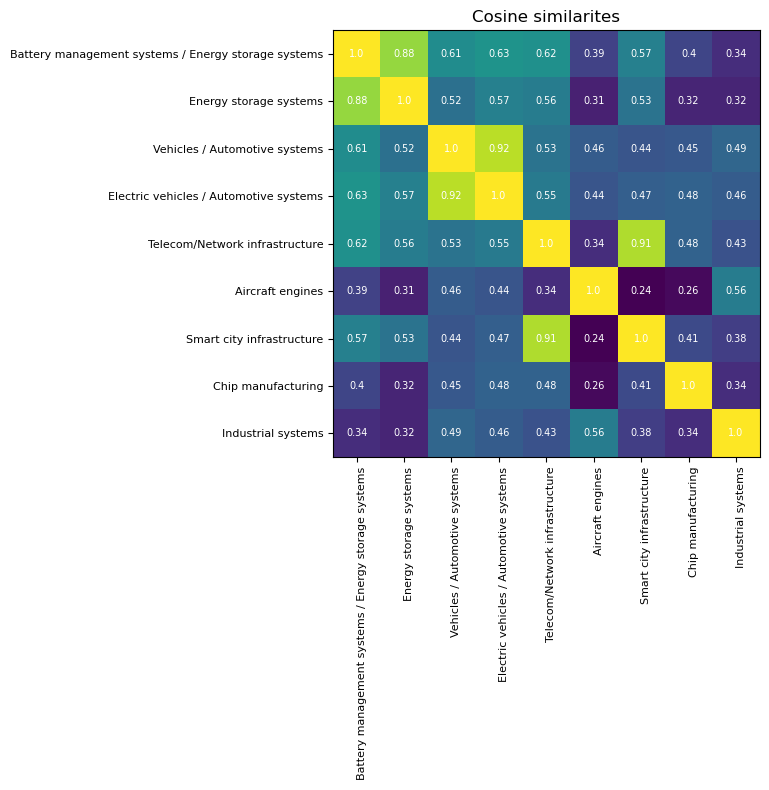

In [251]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = farmers = ['Battery management systems / Energy storage systems',
                        'Energy storage systems',
                        'Vehicles / Automotive systems',
                        'Electric vehicles / Automotive systems',
                        'Telecom/Network infrastructure',
                        'Aircraft engines',
                        'Smart city infrastructure',
                        'Chip manufacturing',
                        'Industrial systems']

harvest = matrix


fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(farmers)), labels=farmers,
              rotation=90, ha="right", rotation_mode="anchor", size=8)
ax.set_yticks(range(len(vegetables)), labels=vegetables, size=8)

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w", size=7)

ax.set_title("Cosine similarites")
fig.tight_layout()
plt.show()

In [252]:
# get all the vectors for the Domain column
from collections import defaultdict
domains = defaultdict()
for d in list(de['Domain']):
    if type(d) == str:
        domains[d] = model.get_word_vector(d.lower())

In [253]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=15, alpha=0.3)
cluster_labels = clusterer.fit_predict(list(domains.values()))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [254]:
Counter(cluster_labels)

Counter({np.int64(-1): 3105,
         np.int64(12): 1114,
         np.int64(10): 124,
         np.int64(11): 109,
         np.int64(8): 101,
         np.int64(7): 63,
         np.int64(3): 52,
         np.int64(5): 39,
         np.int64(13): 37,
         np.int64(6): 37,
         np.int64(0): 35,
         np.int64(1): 33,
         np.int64(4): 31,
         np.int64(9): 30,
         np.int64(2): 30})

In [255]:
list(zip(cluster_labels,list(domains.keys())))[:10]

[(np.int64(12), 'Chip manufacturing'),
 (np.int64(12), 'Manufacturing / Grinding Machines'),
 (np.int64(-1), 'Commercial buildings'),
 (np.int64(8), 'Bridges / Structural Health Monitoring'),
 (np.int64(-1), 'Power transmission and transformation systems'),
 (np.int64(12), 'Industrial systems'),
 (np.int64(-1), 'Power systems / Electric power cables'),
 (np.int64(8), 'Industrial assets / Structural health monitoring'),
 (np.int64(-1), 'Manufacturing production lines'),
 (np.int64(-1),
  'Industrial liquids and process control systems (e.g., Tank systems, liquid-level control in food industries, petrochemicals)')]

In [227]:
c_data = np.array(list(domains.values()))

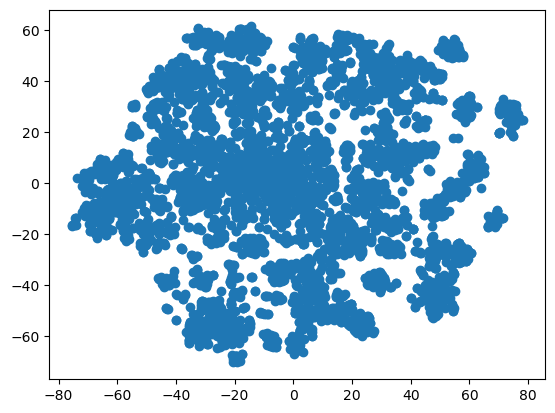

In [229]:
projection = TSNE().fit_transform(c_data)
plt.scatter(*projection.T)

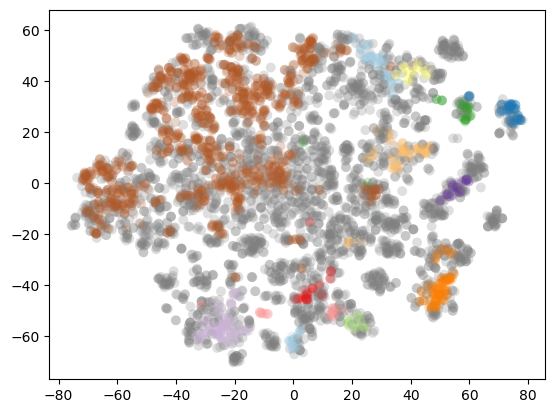

In [231]:
import seaborn as sns

color_palette = sns.color_palette('Paired', 16)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
# import spacy_curated_transformers
# import spacy_transformers
# from spacy_curated_transformers.pipeline.transformer import DEFAULT_CONFIG
# import en_core_web_trf
# nlp = en_core_web_trf.load()

In [55]:
# import spacy
# import spacy_cleaner
# from spacy_cleaner.processing import removers, replacers, mutators

# model = spacy.load("en_core_web_sm")
# pipeline = spacy_cleaner.Pipeline(
#     model,
#     removers.remove_stopword_token,
#     replacers.replace_punctuation_token,
#     mutators.mutate_lemma_token,
# )

# texts = ["Hello, my name is Cellan! I love to swim!"]

# pipeline.clean(texts)

In [48]:
spacy.__version__

'3.8.7'

In [36]:
np.__version__

'2.3.2'

In [37]:
pd.__version__

'2.3.1'

In [38]:
pd.__version__

'2.3.1'

In [ ]:
2825 + 3619 + 849

7293

In [45]:
3559 + 2825

6384

In [46]:
data[6384:].to_csv('Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_6384.csv', index=None)

In [201]:
de[de['Domain']=='']

,Domain,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID


In [ ]:
eid_list = list(df_eid - de_eid)

In [203]:
blanks = set(['2-s2.0-85126287322',
'2-s2.0-105008421699',
'2-s2.0-85148737588',
'2-s2.0-85125872513',
'2-s2.0-85107872040',
'2-s2.0-85145590270',
'2-s2.0-85206934786'])

In [207]:
eid_list = list(blanks - set(eid_list)) + eid_list

In [208]:
eid_list

['2-s2.0-85125872513',
 '2-s2.0-85206934786',
 '2-s2.0-85107872040',
 '2-s2.0-85145590270',
 '2-s2.0-105008421699',
 '2-s2.0-85126287322',
 '2-s2.0-85148737588',
 '2-s2.0-85167810970',
 '2-s2.0-85168748271',
 '2-s2.0-85201317790',
 '2-s2.0-85196096785',
 '2-s2.0-85168427262',
 '2-s2.0-85122626606',
 '2-s2.0-85097591583',
 '2-s2.0-85216668025',
 '2-s2.0-85067835259',
 '2-s2.0-85201139380',
 '2-s2.0-85184374776',
 '2-s2.0-85210256413']

In [210]:
data[data['EID'].isin(eid_list)].to_csv('Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/data_missed.csv', index=None)